In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Unsupervised Machine Learning for Clustering

비지도 학습이라는 것은 우리는 outcome = label variable은 없고 오직 feature만 있는 학습이다. 우리는 레이블 변수가 없다. 하지만, 우리는 그룹핑 즉, 클러스터링이 하고 싶다.



## K-means clustering

K-Means clustering is an unsupervised learning algorithm designed to separate data
into k distinct clusters. The central idea is to assign data points to clusters such that
points within the same cluster are more similar to each other than to points in other
clusters.
At the heart of K-Means is the centroid, which represents the center of a cluster and
is computed as the average position of all points assigned to that cluster. The
algorithm proceeds iteratively:

    - **Initialize**: Choose k initial centroids, typically placed randomly.

    - **Assignment step**: Assign each data point to the nearest centroid using a distance metric such as Euclidean distance.

    - **Update step**: Recalculate each centroid as the mean of the points assigned to it.

    - **Repeat**: Continue reassigning points and updating centroids until the centroid positions stabilize or a maximum number of iterations is reached.

    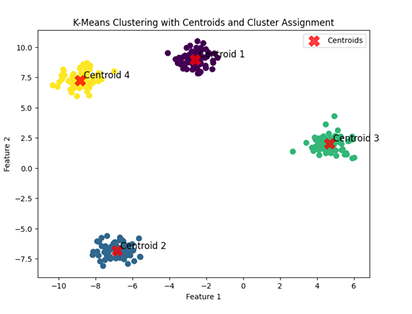

    

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
mpreference = pd.read_csv('/content/drive/MyDrive/data analysis and coding/mpreference.csv')

In [5]:
# Example: Run K-Means with k = 3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(mpreference)

KMeans(n_clusters=3, random_state=42)

In [6]:
# Retrieve labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [7]:
# Add cluster labels to the dataset
mpreference['cluster'] = labels
print(mpreference.head())

   news_hours  entertainment_hours  sports_hours  documentary_hours  cluster
0           6                    6            19                 12        1
1          19                   17             7                 15        0
2          14                    1            11                  3        1
3          10                   16             3                  4        0
4           7                   10             4                  4        2


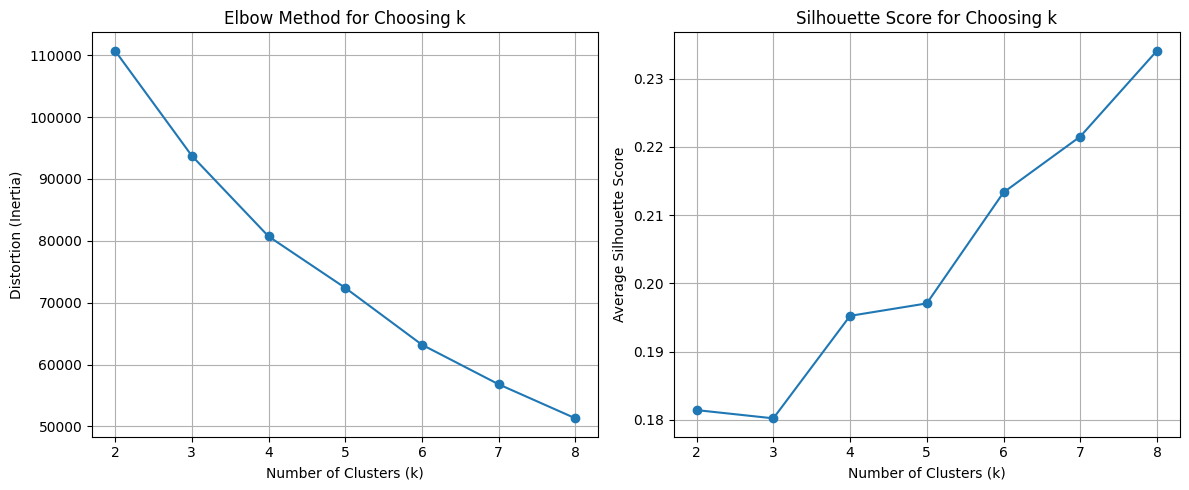

Distortions (Elbow Method):
k=2: 110739.70
k=3: 93761.47
k=4: 80726.32
k=5: 72398.10
k=6: 63201.21
k=7: 56800.63
k=8: 51300.40

Silhouette Scores:
k=2: 0.181
k=3: 0.180
k=4: 0.195
k=5: 0.197
k=6: 0.213
k=7: 0.222
k=8: 0.234


In [9]:
# Choosing the Number of Clusters: Elbow Method & Silhouette Score

from sklearn.metrics import silhouette_score

K_values = range(2, 9)
distortions = []
sil_scores = []

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(mpreference)
    distortions.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(mpreference, kmeans.labels_))

# Plot Elbow and Silhouette Score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_values, distortions, marker='o')
plt.title("Elbow Method for Choosing k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distortion (Inertia)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K_values, sil_scores, marker='o')
plt.title("Silhouette Score for Choosing k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()

# Print results
print("Distortions (Elbow Method):")
for k, d in zip(K_values, distortions):
    print(f"k={k}: {d:.2f}")

print("\nSilhouette Scores:")
for k, s in zip(K_values, sil_scores):
    print(f"k={k}: {s:.3f}")

- The Elbow Method

The Elbow Method examines how the within-cluster sum of squared distances—
often called distortion—changes as k increases. Distortion always decreases as more
clusters are added, but the rate of improvement typically slows. When plotted, the
distortion curve may form an “elbow,” marking a point where additional clusters
provide diminishing benefits. This elbow suggests a balance between simplicity and
explanatory power.

- The Silhouette Score

The Silhouette Score evaluates how well-separated the clusters are. It compares
how close each point is to its assigned cluster relative to other clusters and ranges
from –1 to 1. Higher values indicate clearer, more coherent clusters.

# PCA

이것은 클러스터링이 아니다.

kmean에서 우리는 다양한 차원이 있었다. 엔터 스포츠 등등... 이 다양한 차원을 줄이기 위해서! 우리는 reduce 차원을 하기 위해서 우리는 PCA 차원을 줄이기 위해서이다. 클러스터링이 아니다.

너무 많은 변수를 줄이기 위함이다. dimension을 줄이기 위해!

K_means 군집분석은 클러스터로 나누지면 결국 왜 그들이 그렇게 분류되었는지는  말해주지 않는다. 왜 이 사람들이 같은 군집인가? 에 대답하기 위해서 주성분 분석을 한다. 그러므로 PCA는 K_means가 각 클러스터를 어떻게 설명하는가를 보여준다.  그러므로 이 두개를 수행하고 연결해보면?

클러스터 0은 PCA1이 적으니 엔터테이먼트 중심 소비이면서 PC2가 적으니 스포츠를 적게 보는 시청자이다. 즉, 엔터테이먼트 중심 사용자이다
클러스터1은 주성분 1이 높아 다큐를 많이 보고 주성분 2는 보통이므로 다큐멘터리 중심 사용자이다. 클러스트 2는 스포츠를 많이 보기 떄문에 스포츠 중심 사용자이다.

결국 K_means가 만든 군집이 PCA가 밝혀낸 주요 변동 방향과 일치하는 것이다. 그럼므로 k_means에서 만든 클러스터가 의미 없이 임의로 나눈게 안리ㅏ 데이터의 가장 중요한 소비 차원에 근거해서 자연스럽게 형성되었다는 증거이다!! 그러므로 PCA는 클러스터의 군집의 타당성을 부여하는 역할을 한다.

정리: K-means는 유사한 미디어 소비 패턴을 가진 집단을 형성하고,
PCA는 그 군집들이 다큐멘터리–엔터테인먼트 소비의 균형과
스포츠 소비 정도라는 주요 변동 축에 따라 구분됨을 보여주며
군집의 해석 가능성을 높여준다.

*PCA를 통해 연구자는 클러스터가 데이터의 주요 변이 축과 어떻게 관련되는지 이해할 수 있다.*

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

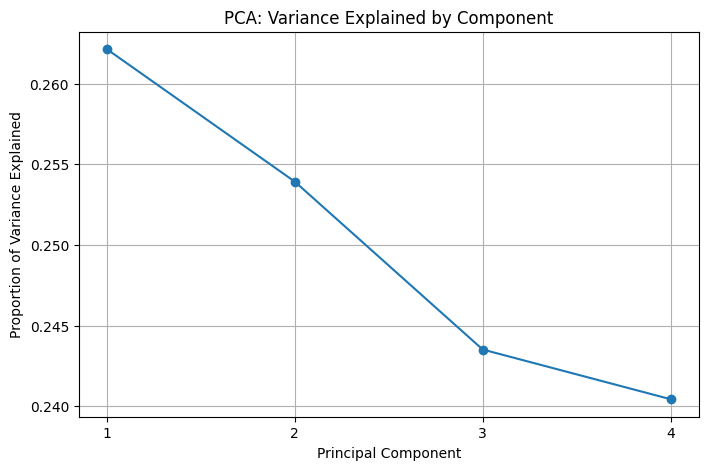

Proportion of variance explained by each component:
PC1: 0.262
PC2: 0.254
PC3: 0.244
PC4: 0.240

Cumulative variance explained by first 2 components: 0.516


In [11]:
# Select the same feature columns used in K-Means
feature_cols = ['news_hours', 'entertainment_hours', 'sports_hours', 'documentary_hours']
X = mpreference[feature_cols].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA using all components (for loadings)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance explained by each component
explained_variance = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance) + 1)

plt.figure(figsize=(8, 5))
plt.plot(components, explained_variance, marker='o')
plt.xticks(components)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('PCA: Variance Explained by Component')
plt.grid(True)
plt.show()

print("Proportion of variance explained by each component:")
for i, var in enumerate(explained_variance, start=1):
    print(f"PC{i}: {var:.3f}")

print(f"\nCumulative variance explained by first 2 components: {explained_variance[:2].sum():.3f}")

In [12]:
# Loadings: how original variables contribute to each PC
loading_matrix = pca.components_.T  # shape: n_features x n_components

loadings_df = pd.DataFrame(
    loading_matrix,
    index=feature_cols,
    columns=[f'PC{i}' for i in range(1, len(feature_cols) + 1)]
)

print("\nPCA Loadings (Contribution of each variable to each PC):")
print(loadings_df.round(3))


PCA Loadings (Contribution of each variable to each PC):
                       PC1    PC2    PC3    PC4
news_hours          -0.463 -0.508  0.684  0.246
entertainment_hours -0.586  0.357 -0.359  0.633
sports_hours        -0.287  0.723  0.486 -0.398
documentary_hours    0.600  0.302  0.409  0.617


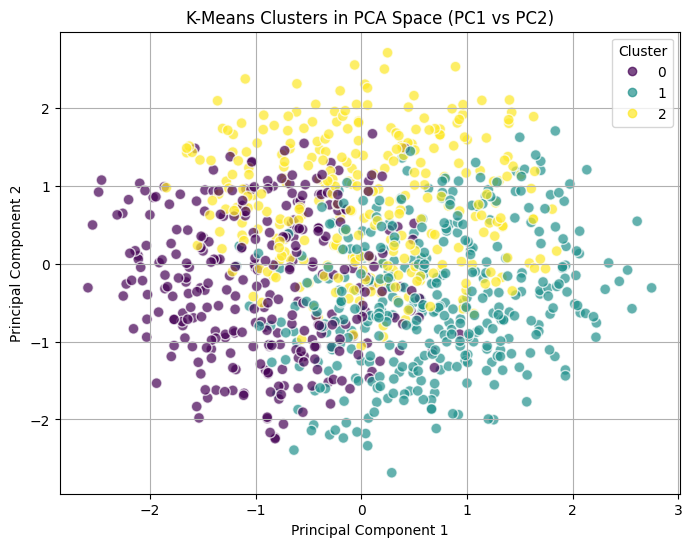

In [13]:
# Add PC1 and PC2 scores to the DataFrame
mpreference['PC1'] = X_pca[:, 0]
mpreference['PC2'] = X_pca[:, 1]

# 2D scatter: PC1 vs PC2 colored by K-Means cluster
plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    mpreference['PC1'],
    mpreference['PC2'],
    c=mpreference['cluster'],   # cluster labels from K-Means
    cmap='viridis',
    alpha=0.7,
    edgecolors='w',
    s=60
)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters in PCA Space (PC1 vs PC2)')
plt.grid(True)

handles, labels_unique = scatter.legend_elements()
plt.legend(handles, labels_unique, title="Cluster", loc='best')

plt.show()


PC1과 PC2가 전체 분산의 절반 조금 넘는 정도만 설명하기 때문에,
군집이 완벽하게 분리되지 않는 것은 ‘예상된 결과’이다
PC1 + PC2가 설명하는 분산: 51.6%

즉,

데이터의 약 절반만 2차원으로 요약됨

나머지 약 48.4%의 정보는 PC3, PC4에 남아 있음
